## Import library

In [1]:
#import libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.ticker as mtick
import calendar
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import matplotlib.dates as matdates
from datetime import datetime, timedelta
# from google.colab import drive
import os
from bokeh.io import output_notebook, show
output_notebook()
# drive.mount('/content/gdrive')

Loading BokehJS ...

# Read Twin Cities data

In [5]:
#Download Files "Weekly_Patterns.csv" and "core_places.csv" by copy and pasting Google Drive link:
#https://drive.google.com/drive/folders/1gE-yFdIgpPjkAIj_EtumlrRvpQHs0514?usp=sharing
#Change the path variable as per the local machine address:
path = "/Users/arunsharma/Desktop/COVID-19/"
# path = "/content/gdrive/My Drive/UMN/Research/Ongoing Research/covid-19 workshop/visualization/"
df = pd.read_csv(path+"traffic_data.csv")
df = df.drop(0)
df = df.set_index(np.arange(0, len(df)))

## Create Weekly data from daily df data

In [6]:
traffic = df.set_index(np.arange(0, len(df)))
traffic = df.groupby(df.index // 7).sum()

# Read Mndot state-wide data

In [7]:
state_wide = pd.read_csv(path + "Daily_Volume_Change_2020-11-22_update-12228064-v30.csv")
state_wide = state_wide.T
state_wide = state_wide.reset_index()
state_wide = state_wide.set_index(np.arange(1, len(state_wide) + 1))
for col1, col2 in zip(state_wide.iloc[0][1:], state_wide.columns[1:]):
  state_wide = state_wide.rename(columns={col2:col1})
state_wide = state_wide.rename(columns={"index": "date"})
state_wide = state_wide.drop([1])
state_wide[state_wide["date"] == "4/4/2021"]
state_wide_old = state_wide[:460]

## Create Weekly data from daily Mndot state-wide data

In [8]:
state_wide_weekly = state_wide_old.set_index(np.arange(0, len(state_wide_old)))
state_wide_weekly = state_wide_weekly.groupby(state_wide_weekly.index // 7).sum()
state_wide_weekly = state_wide_weekly["MnDOT Statewide"]

## Merge the two dataset 

In [9]:
data = traffic
data["MnDOT Statewide"] = state_wide_weekly

In [10]:
data.to_csv(path + "weekly_data.csv")

## Create weekly time stamps

In [11]:
start, end = '2020-01-01 00:00:00', '2021-04-04 00:00:00'
rng = pd.date_range(start, end, freq='10080min')
ts = pd.DataFrame(np.arange(len(rng)) * 7, index=rng)
ts = ts.reset_index()
data["date"] = ts["index"]

## Plot data for predicted vs observed traffic data

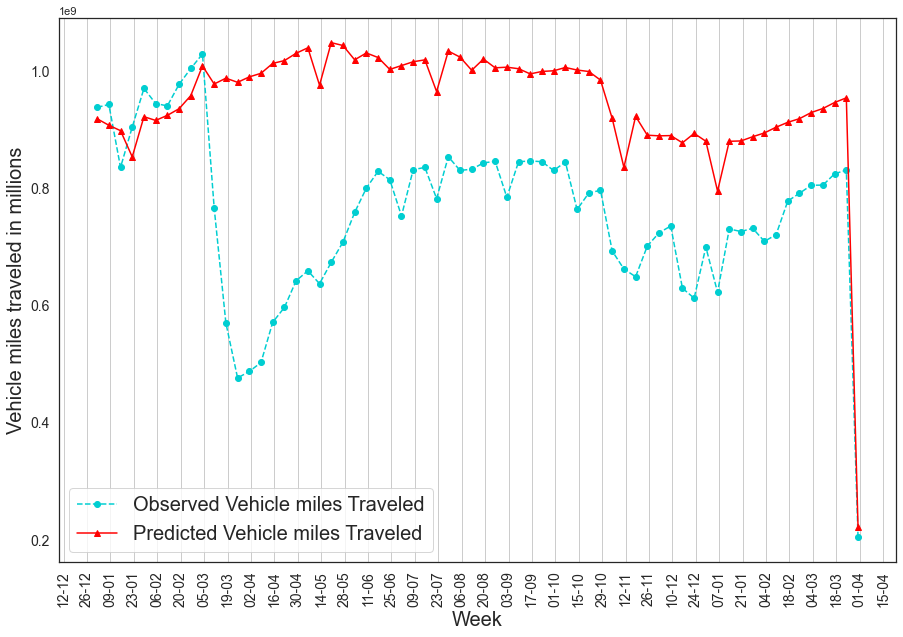

In [13]:
import matplotlib.dates as mdates
sns.set()
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.tick_params(axis = 'x', labelrotation = 90, labelsize = 14)
ax1.tick_params(axis = 'y', labelsize = 14)
ax1.plot(data['date'], data['actual_volume'], marker = "o", color = "#00CED1", alpha = 1.0, linestyle="dashed",  label = 'Observed Vehicle miles Traveled')
ax1.plot(data['date'], data['predicted_volume'], marker = "^", color = "#FF0000", alpha = 1.0,  label = 'Predicted Vehicle miles Traveled')
ax1.legend(loc = "lower left", fontsize = 20)
plt.ylabel("Vehicle miles traveled in millions", fontsize=20)
plt.xlabel("Week", fontsize=20)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.grid(axis = "x")
date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)
# start, end = ax1.get_xlim()
# ax1.xaxis.set_ticks(np.arange(start, end, 10))
# plt.savefig(path + 'Fig/relatives.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot weekly traffic data from typical traffic

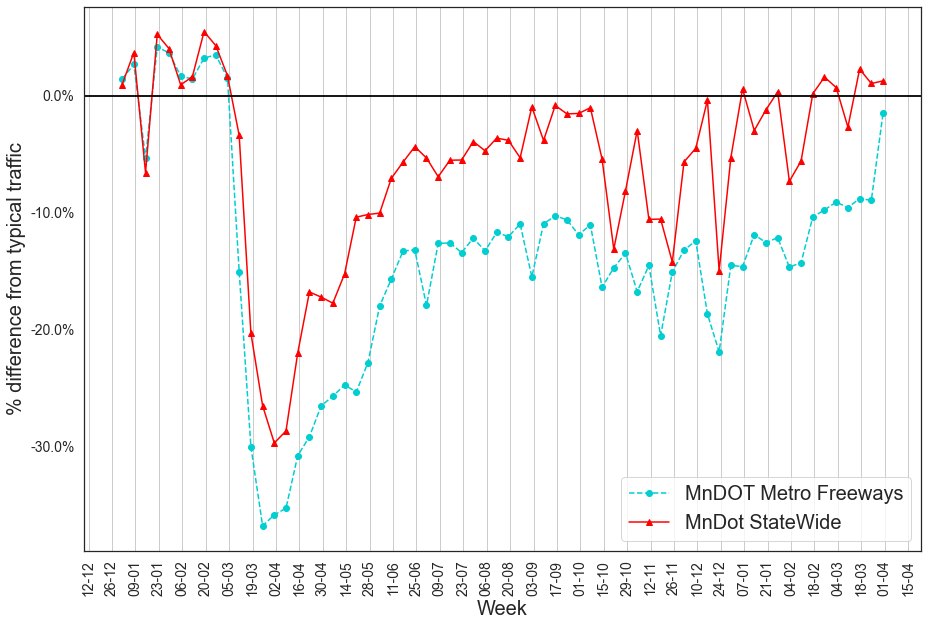

In [15]:
import matplotlib.dates as mdates
sns.set()
sns.set_style("white")

fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.tick_params(axis = 'x', labelrotation = 90, labelsize = 14)
ax1.tick_params(axis = 'y', labelsize = 14)
ax1.plot(data['date'], data['volume_difference_percent']/10, marker = "o", color = "#00CED1", alpha = 1.0, linestyle="dashed",  label = 'MnDOT Metro Freeways')
ax1.plot(data['date'], data['MnDOT Statewide']/10, marker = "^", color = "#FF0000", alpha = 1.0,  label = 'MnDot StateWide')


ax1.legend(loc = "lower right", fontsize = 20)
plt.ylabel("% difference from typical traffic", fontsize=20)
plt.xlabel("Week", fontsize=20)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=14))
plt.grid(axis = "x")
date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.axhline(y= 0.000,color = "black", alpha= 0.9, linewidth=2)
# start, end = ax1.get_xlim()
# ax1.xaxis.set_ticks(np.arange(start, end, 10))
# plt.savefig(path + 'Fig/diff.png', dpi=300, bbox_inches='tight')
plt.show()